In [3]:
import networkx as nx
import scipy
import matplotlib.pyplot as plt

# Tool Function To draw the 
def draw_graph(G):
    options = {
        'node_color': 'yellow',

        'node_size': 300,
        'width': 3,
        'with_labels': True
    }
    nx.draw(G, **options)
    plt.show()
    


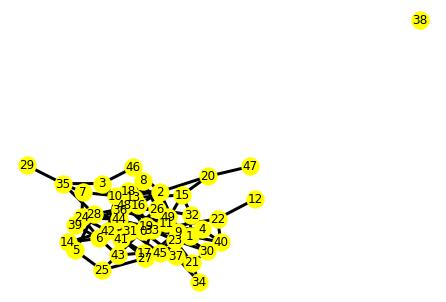

In [4]:
# G1 = nx.gnm_random_graph(n, m)
# print(G1.nodes)
# print(G1.edges)
G1 = nx.Graph()
G1.add_nodes_from([i for i in range(50)])
G1.add_edges_from([(0, 41), (0, 44), (0, 49), (0, 37), (0, 31), (0, 13), (1, 40), (1, 32), (1, 49), (1, 33), (1, 45), (2, 10), (2, 18), (2, 16), (2, 9), (2, 46), (2, 26), (2, 20), (3, 48), (3, 36), (3, 10), (3, 46), (3, 35), (4, 19), (4, 40), (5, 25), (5, 28), (6, 39), (6, 31), (6, 14), (6, 43), (6, 24), (6, 33), (7, 13), (7, 35), (7, 24), (8, 26), (8, 48), (8, 46), (9, 27), (9, 30), (10, 42), (10, 13), (10, 48), (11, 37), (11, 36), (11, 15), (12, 22), (13, 15), (13, 16), (14, 42), (15, 32), (15, 20), (16, 49), (16, 28), (16, 19), (16, 18), (17, 42), (17, 21), (17, 43), (17, 33), (17, 45), (18, 36), (18, 44), (19, 23), (19, 43), (19, 49), (19, 28), (20, 47), (21, 34), (21, 23), (21, 40), (22, 40), (22, 33), (23, 30), (23, 27), (23, 26), (23, 33), (23, 32), (24, 44), (24, 42), (25, 43), (25, 27), (26, 31), (26, 32), (26, 36), (27, 41), (27, 45), (28, 35), (29, 35), (31, 45), (31, 36), (31, 44), (33, 48), (33, 44), (33, 42), (34, 37), (36, 39), (41, 42), (41, 48)]
)
draw_graph(G1)



[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {38}]
<class 'list'>


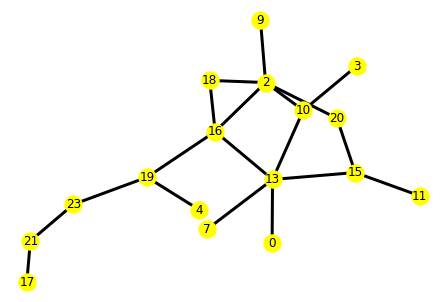

In [5]:


n = 50 # number of nodes
m = 100 # number of edges

graphs = list(nx.connected_components(G1))
print(graphs)
print(type(graphs))
# Generate a subgraph of G1
sub_node = n // 5

sub_edges = [0, 2, 3, 4, 7, 9, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 23]
G2 = G1.subgraph(sub_edges)

draw_graph(G2)

In [6]:
# A simple demo

def check_exact_match(query, target):
    # 
    return nx.is_isomorphic(query, target)


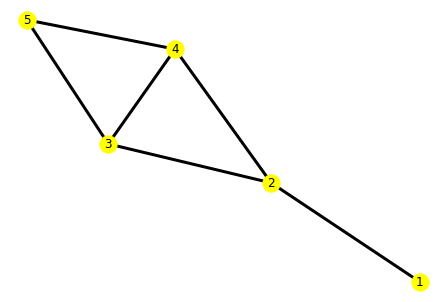

In [7]:
G_simple = nx.Graph()
nx.add_path(G_simple, [i for i in range(1,6)])
G_simple.add_edge(2,4)
G_simple.add_edge(3,5)
draw_graph(G_simple)

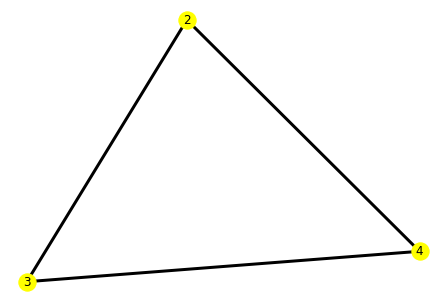

In [8]:
G_simple_sub = G_simple.subgraph([2,3,4])
draw_graph(G_simple_sub)


In [9]:
from itertools import combinations

def generate_all_subgraphs(n_nodes, target):
    target_nodes_list = target.nodes
    
    combs = list(combinations(target_nodes_list, n_nodes))
    res = []
    for i in range(len(combs)):
        res.append(target.subgraph(list(combs[i])))
    return res

generate_all_subgraphs(3, G_simple)

In [10]:
n_nodes = len(G_simple_sub.nodes)

def check_subgraph_matching(query, target):
    candidates = generate_all_subgraphs(n_nodes, target)
    for graph in candidates:
        if check_exact_match(query, graph):
            print('found')
            return True
    return False

In [11]:
check_subgraph_matching(G_simple_sub, G_simple)

found


True

In [12]:
check_subgraph_matching(G2, G1)

False

In [13]:
"""Read Large Graph"""


""" Generate Connected Query """

# 1. Random - Check
import random

def brute_random_subgraph_generation(num_sub_nodes, G):
    node_list = G.nodes
    found = False
    while not found:
        sub_nodes = random.sample(node_list, num_sub_nodes)
        if nx.is_connected(G.subgraph(sub_nodes)):
            found = True # To be discussed
    return G.subgraph(sub_nodes)


In [14]:
simple_G_sub = brute_random_subgraph_generation(3, G_simple)

In [15]:
print(simple_G_sub.nodes)
print(simple_G_sub.edges)

[3, 4, 5]
[(3, 4), (3, 5), (4, 5)]


In [16]:
big_sub = brute_random_subgraph_generation(14, G1)

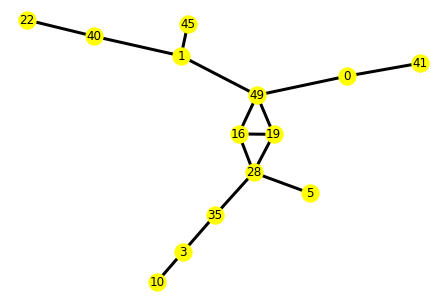

In [17]:
draw_graph(big_sub)

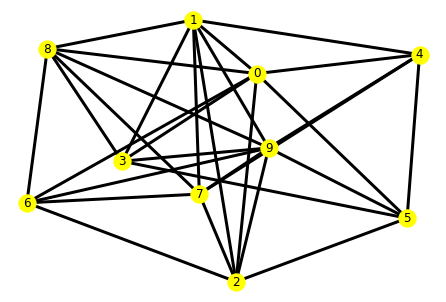

In [18]:
# Let's try bigger graphs
bigG = nx.gnm_random_graph(10, 30)
draw_graph(bigG)

In [19]:
nx.is_connected(bigG)

True

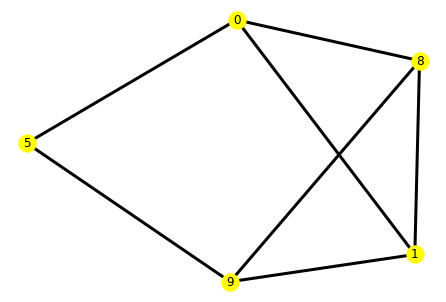

In [20]:
# 生成速度不行
bigG_sub = brute_random_subgraph_generation(5, bigG)
draw_graph(bigG_sub)

In [21]:
check_subgraph_matching(bigG_sub, bigG)

False

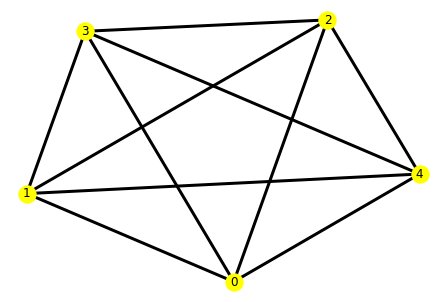

In [33]:
G = nx.complete_graph(5)
draw_graph(G)
t = nx.triangles(G)
d = G.degree()

In [35]:
props = [[d, t[v]] for v, d in d]
print(props)

[[4, 6], [4, 6], [4, 6], [4, 6], [4, 6]]


In [38]:
c =  nx.number_of_cliques(G)
print(c)

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1}


In [44]:
output = nx.find_cliques(G)
for item in output:
    print(item)

[0, 1, 2, 3, 4]


<class 'networkx.classes.reportviews.NodeView'>
<class 'list'>


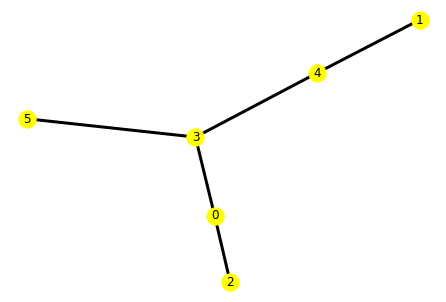

In [67]:
g = nx.Graph()
g.add_nodes_from([i for i in range(6)])
g.add_edge(2,0)
g.add_edge(4,1)
g.add_edge(4,3)

# Connect Back
g.add_edge(5,3)
g.add_edge(0,3)
print(type(g.nodes()))
print(type(list(g.nodes())))
draw_graph(g)

In [58]:
output = nx.find_cliques(g)
for item in output:
    print(item)

[1, 4]
[2, 0]
[3, 0]
[3, 4]
[3, 5]


In [68]:
c =  nx.number_of_cliques(g)
print(c)

{0: 2, 1: 1, 2: 1, 3: 3, 4: 2, 5: 1}


In [99]:
from SubGraphMatcher import SubGraphMatcher

In [100]:
G_t = nx.path_graph(4)
G_q = nx.path_graph(2)
SGM = SubGraphMatcher(G_q, G_t)
SGM.is_subgraph_match()

AttributeError: module 'networkx' has no attribute 'is_isomorphism'